In [107]:
# 参考教程 https://www.jianshu.com/p/d02980fd7b54

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell


In [49]:
# 配置项
# 这个要放到设置中文之前否则还是小方框
plt.style.use("seaborn")

# 指定默认字体 用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

# #全部行都能输出
InteractiveShell.ast_node_interactivity = "all"

In [36]:
# 参考教程 https://www.jianshu.com/p/d02980fd7b54

In [2]:
tf.__cached__

'/anaconda3/lib/python3.7/site-packages/tensorflow/__pycache__/__init__.cpython-37.pyc'

In [3]:
tf.__version__

'2.0.0-beta0'

In [7]:
fashion_mnist = keras.datasets.fashion_mnist

In [8]:
fashion_mnist

<module 'tensorflow.python.keras.api._v2.keras.datasets.fashion_mnist' from '/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [10]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [12]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [15]:
np.unique(train_labels), np.unique(test_labels)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [16]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [18]:
[*zip(np.unique(train_labels), class_names)]

[(0, 'T-shirt/top'),
 (1, 'Trouser'),
 (2, 'Pullover'),
 (3, 'Dress'),
 (4, 'Coat'),
 (5, 'Sandal'),
 (6, 'Shirt'),
 (7, 'Sneaker'),
 (8, 'Bag'),
 (9, 'Ankle boot')]

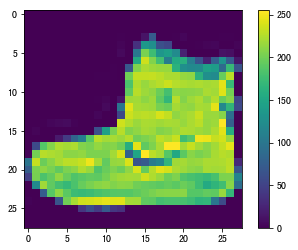

In [22]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [51]:
# 因为这是像素  rgb在0~255范围内
# 将像素归一化到0~1之间
train_images = train_images / 255
test_images = test_images / 255

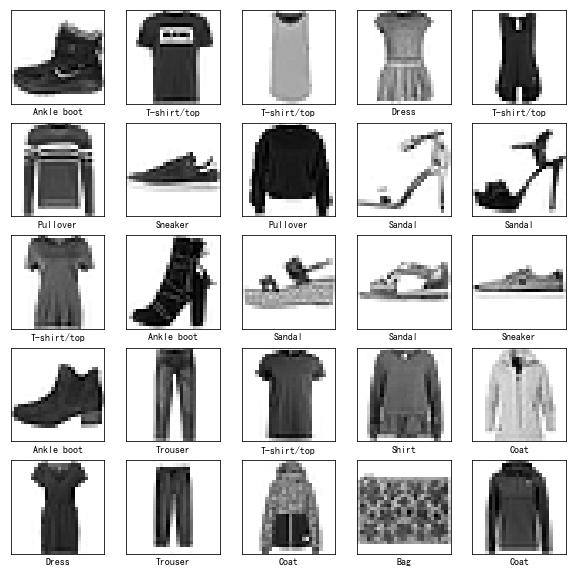

In [42]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[train_labels[i]])
plt.show()
    

In [77]:
model = keras.Sequential([
    # 把数据(60000, 28, 28) 变成 (60000, 784),实际上就是降维 784 = 28 * 28
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    # 10标签值 所以要输出10个值,每个值代表这个标签的概率
    keras.layers.Dense(10, activation='softmax')
])

# 模型设置参数
# optimizer 优化器
# loss 损失函数
# metrics 评估指标
model.compile(
#     optimizer=tf.keras.optimizers.Adam(0.001), 
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
# 训练模型
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 65us/sample - loss: 1.1071 - accuracy: 0.6615
Epoch 2/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.6503 - accuracy: 0.7664
Epoch 3/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.5740 - accuracy: 0.7921
Epoch 4/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.5305 - accuracy: 0.8102
Epoch 5/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.5028 - accuracy: 0.8224
Epoch 6/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.4828 - accuracy: 0.8289
Epoch 7/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.4679 - accuracy: 0.8357
Epoch 8/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.4561 - accuracy: 0.8394
Epoch 9/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.4461 - accuracy: 0.8433
Epoch 10/10
60

In [78]:
# 评估模型
model.evaluate(test_images, test_labels)


10000/10000 [==============================] - 0s 36us/sample - loss: 0.4655 - accuracy: 0.8323


[0.46551056418418885, 0.8323]

In [84]:
# 预测
pred = model.predict(test_images)
np.sum(pred[0])
pred[0]


1.0

array([9.8732562e-07, 5.4481820e-08, 6.0125503e-06, 9.2439968e-06,
       8.4350513e-06, 1.6147919e-01, 2.2014230e-05, 2.7109224e-01,
       3.5212494e-03, 5.6386060e-01], dtype=float32)

In [80]:
# 取出概率最大值的索引 索引即标签值
np.argmax(pred[0])

9

In [81]:
# 真实标签值
test_labels[0]

9

In [72]:
def plot_image(i, predictions_array, true_label, img):
    prob_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    pred_label = np.argmax(prob_array)
    color = 'blue'
    if pred_label != true_label:
        color = 'red'
    plt.xlabel("{} {:.2f}% ({})".format(class_names[pred_label],
                                100*np.max(prob_array),
                                class_names[true_label]),
                                color=color)
    
def plot_value_array(i, predictions_array, true_label):
    prob_array, true_label = predictions_array[i], true_label[i]
    plt.xticks([])
    plt.yticks([])
    
    thisplot = plt.bar(range(10), prob_array, color='#777777')
    plt.ylim([0, 1])
    
    pred_label = np.argmax(prob_array)
    thisplot[pred_label].set_color('red')
    thisplot[true_label].set_color('blue')
    
    
    

<Figure size 432x216 with 0 Axes>

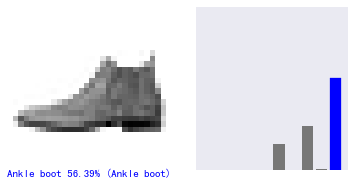

In [82]:
# plot_image(0, pred, test_labels, test_images)
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)

plt.subplot(1,2,2)
plot_value_array(i, pred,  test_labels)
plt.show()

<Figure size 432x216 with 0 Axes>

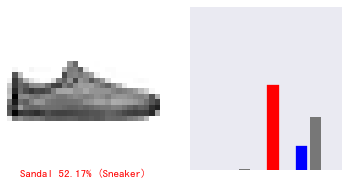

In [75]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, pred, test_labels, test_images)

plt.subplot(1, 2, 2)
plot_value_array(i, pred, test_labels)

<Figure size 864x720 with 0 Axes>

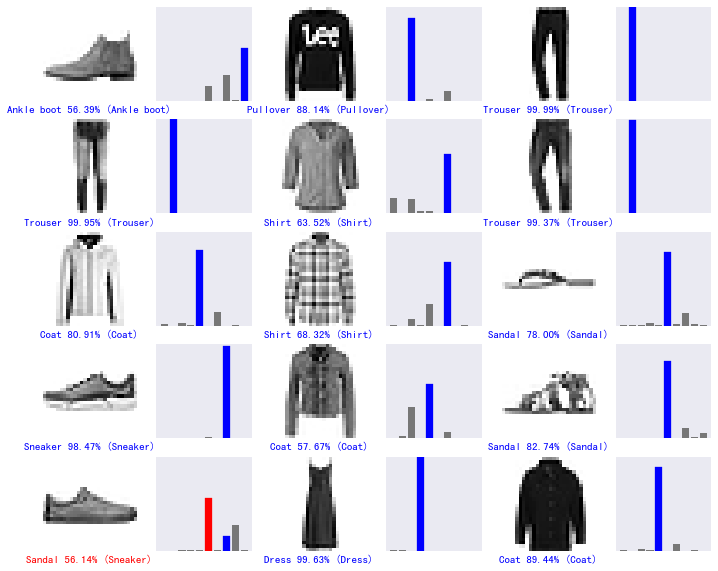

In [88]:
num_rows = 5
num_cols = 3
plt.figure(figsize=(12, 10))
num_imgs = num_rows * num_cols
for i in range(num_imgs):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, pred, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, pred, test_labels)
plt.show()

In [89]:
test_img = test_images[0]
test_img.shape

(28, 28)

In [98]:
# np.newaxis 升维
test_img[np.newaxis, ...].shape
np.expand_dims(test_img, 0).shape

(1, 28, 28)

(1, 28, 28)

In [99]:
# 图片升维后进行预测
img = np.expand_dims(test_img, 0)
prob_single = model.predict_classes(img)
prob_single

array([9])

In [100]:
model.predict_proba(img)

array([[9.8732392e-07, 5.4482037e-08, 6.0125572e-06, 9.2439896e-06,
        8.4350613e-06, 1.6147925e-01, 2.2014214e-05, 2.7109203e-01,
        3.5212501e-03, 5.6386071e-01]], dtype=float32)

In [101]:
model.predict(img)

array([[9.8732392e-07, 5.4482037e-08, 6.0125572e-06, 9.2439896e-06,
        8.4350613e-06, 1.6147925e-01, 2.2014214e-05, 2.7109203e-01,
        3.5212501e-03, 5.6386071e-01]], dtype=float32)

([<matplotlib.axis.XTick at 0xb442129e8>,
 <a list of 10 Text xticklabel objects>)

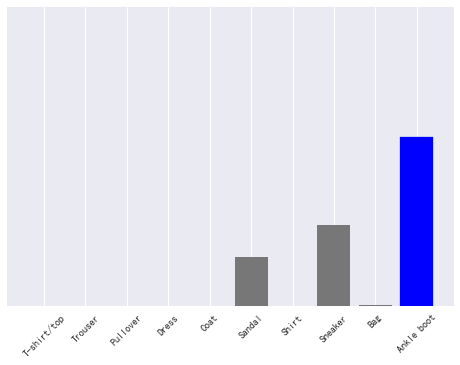

In [102]:
plot_value_array(0, pred, test_labels)
plt.xticks(range(10), class_names, rotation=45)